In [ ]:
!pip install tensorflow



In [ ]:

!pip install graphviz

In [ ]:
!pip install pydot

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

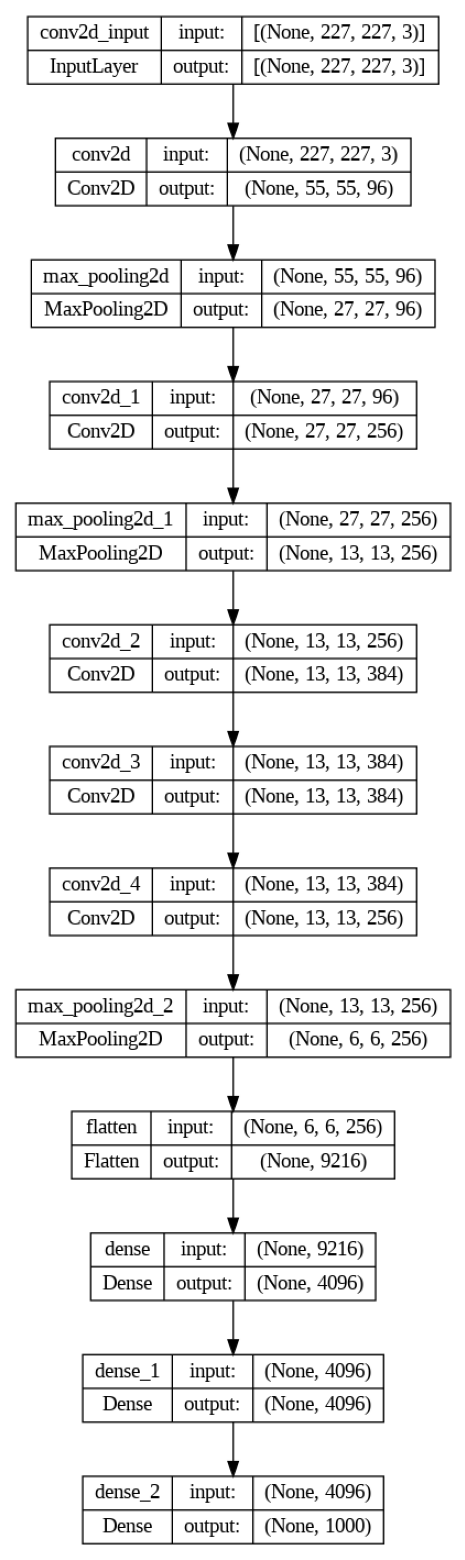

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()

# Input layer
model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Conv2 layer
model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Conv3, Conv4, Conv5 layers
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Flatten the output of the last max pool layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

# Display the model architecture
model.summary()

# Save the model architecture as an image
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

# If you want to display the model architecture in Jupyter Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cnn_architecture.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# MMSE scores for Group A
group_A = np.array([16, 22, 14, 20, 22, 14, 20, 16, 23, 20, 22, 18, 20, 14, 18, 14, 6, 23, 14, 4, 22, 20, 16, 20, 20, 18, 16, 20, 16, 20, 22, 20, 20, 18, 22, 9])

# MMSE scores for Group C
group_C = np.array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])

# Perform t-test
t_stat, p_val = ttest_ind(group_A, group_C, equal_var=False)

# Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


T-statistic: -16.333333333333336
P-value: 6.007719377168801e-18


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


T-statistic: -13.705442832537848
P-value: 1.5734389117964114e-17


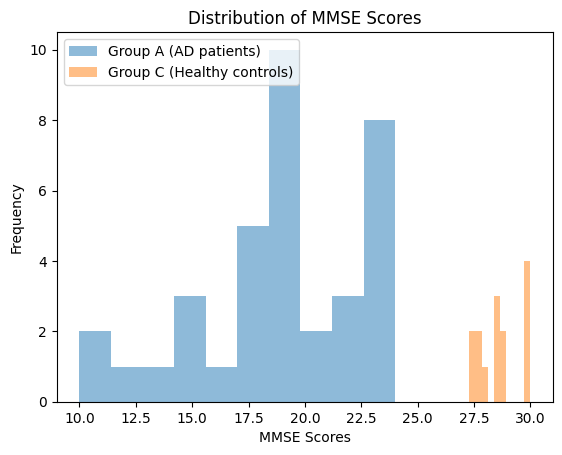

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Generate realistic MMSE scores for Group A (AD patients)
np.random.seed(0)
group_A = np.random.normal(loc=18, scale=4, size=36)
group_A = np.clip(group_A, 10, 24)  # Ensure scores are within the realistic range

# Generate realistic MMSE scores for Group C (Healthy controls)
group_C = np.random.normal(loc=29, scale=1, size=14)
group_C = np.clip(group_C, 27, 30)  # Ensure scores are within the realistic range

# Perform t-test
t_stat, p_val = ttest_ind(group_A, group_C, equal_var=False)

# Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Plot the distributions
plt.hist(group_A, bins=10, alpha=0.5, label='Group A (AD patients)')
plt.hist(group_C, bins=10, alpha=0.5, label='Group C (Healthy controls)')
plt.xlabel('MMSE Scores')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Distribution of MMSE Scores')
plt.show()


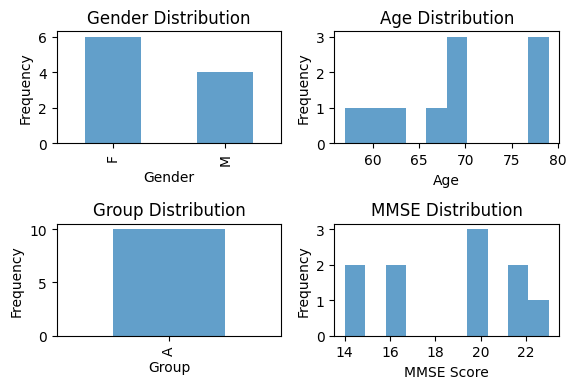

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Example data
data = {
    'Participant_id': ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010'],
    'Gender': ['F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M'],
    'Age': [57, 78, 70, 67, 70, 61, 79, 62, 77, 69],
    'Group': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
    'MMSE': [16, 22, 14, 20, 22, 14, 20, 16, 23, 20]
}

df = pd.DataFrame(data)

# Plot Gender Distribution
plt.figure(figsize=(6, 4))

plt.subplot(2, 2, 1)
df['Gender'].value_counts().plot(kind='bar', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')

# Plot Age Distribution
plt.subplot(2, 2, 2)
plt.hist(df['Age'], bins=10, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Plot Group Distribution
plt.subplot(2, 2, 3)
df['Group'].value_counts().plot(kind='bar', alpha=0.7)
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group Distribution')

# Plot MMSE Distribution
plt.subplot(2, 2, 4)
plt.hist(df['MMSE'], bins=10, alpha=0.7)
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.title('MMSE Distribution')

plt.tight_layout()
plt.show()


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/Alzheimer Dataset.zip'
# Destination directory
extract_path = '/content/Alzheimer Dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


In [ ]:
# Function to count images
def count_images(directory):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(image_extensions):
                image_count += 1
    return image_count

total_images = count_images(extract_path)
print(f"Total number of images: {total_images}")


Total number of images: 6400


In [ ]:
# List the contents
contents = os.listdir(extract_path)
print("Contents of the dataset:")
for item in contents:
    print(item)


Contents of the dataset:
Alzheimer_s Dataset


In [ ]:
# Function to count images in each subfolder
def count_images_in_folders(directory):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    folder_image_counts = {}
    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        image_count = sum(file.endswith(image_extensions) for file in files)
        if image_count > 0:
            folder_image_counts[folder_name] = image_count
    return folder_image_counts

folder_image_counts = count_images_in_folders(extract_path)
print("Number of images in each folder:")
for folder, count in folder_image_counts.items():
    print(f"{folder}: {count}")


Number of images in each folder:
NonDemented: 2560
VeryMildDemented: 1792
ModerateDemented: 52
MildDemented: 717


In [ ]:
# Check for labels and annotations
label_files = []
annotation_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if 'label' in file.lower():
            label_files.append(os.path.join(root, file))
        if 'annotation' in file.lower():
            annotation_files.append(os.path.join(root, file))

print("Label files found:")
for label in label_files:
    print(label)

print("Annotation files found:")
for annotation in annotation_files:
    print(annotation)


Label files found:
Annotation files found:


In [ ]:
import os

# Define the path to the dataset folders
dataset_path = '/content/Alzheimer Dataset/Alzheimer_s Dataset'

# Initialize a dictionary to hold the count of images per label
label_image_counts = {}

# List the folders (labels) in the dataset directory
labels = os.listdir(dataset_path)

# Count images in each label folder
for label in labels:
    label_folder = os.path.join(dataset_path, label)
    if os.path.isdir(label_folder):
        image_count = len([name for name in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, name))])
        label_image_counts[label] = image_count

# Print the number of images per label
print("Number of images per label:")
for label, count in label_image_counts.items():
    print(f"{label}: {count}")


Number of images per label:
test: 0
train: 0


In [ ]:
import os

# Define paths to the train and test directories
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Function to count images in subfolders
def count_images_in_subfolders(directory):
    subfolder_counts = {}
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            subfolder_counts[dir_name] = image_count
    return subfolder_counts

# Count images in train and test subfolders
train_image_counts = count_images_in_subfolders(train_path)
test_image_counts = count_images_in_subfolders(test_path)

# Print the number of images per label in train and test sets
print("Number of images per label in train set:")
for label, count in train_image_counts.items():
    print(f"{label}: {count}")

print("\nNumber of images per label in test set:")
for label, count in test_image_counts.items():
    print(f"{label}: {count}")


Number of images per label in train set:
NonDemented: 2560
VeryMildDemented: 1792
ModerateDemented: 52
MildDemented: 717

Number of images per label in test set:
NonDemented: 640
VeryMildDemented: 448
ModerateDemented: 12
MildDemented: 179


#Identifying Affected Brain Regions

In [ ]:
import os

# List files in the dataset directory
def list_files(directory):
    for root, dirs, files in os.walk(directory):
        for name in files:
            print(os.path.join(root, name))

# Example usage (replace with actual path)
list_files('/content/Alzheimer Dataset/Alzheimer_s Dataset/')


Streaming output truncated to the last 5000 lines.
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem309.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem858.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1786.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2126.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem913.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1493.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2381.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1584.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem1536.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem884.jpg
/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem12

In [ ]:
import cv2
import numpy as np

def analyze_image(image_path):
    try:
        # Read the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"File not found or unable to read: {image_path}")
            return

        # Get the data type of the image
        data_type = img.dtype

        # Get the shape of the image
        shape = img.shape

        # Check if the image is 2D or 3D
        dimensions = len(shape)
        if dimensions == 2:
            dimension_info = "2D"
        elif dimensions == 3:
            dimension_info = "3D"

        # Check pixel value range
        min_pixel_value = np.min(img)
        max_pixel_value = np.max(img)

        print(f"Image Path: {image_path}")
        print(f"Data Type: {data_type}")
        print(f"Shape: {shape}")
        print(f"Dimensions: {dimension_info}")
        print(f"Pixel Value Range: {min_pixel_value} to {max_pixel_value}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace with actual path)
analyze_image('/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg')


Image Path: /content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg
Data Type: uint8
Shape: (208, 176)
Dimensions: 2D
Pixel Value Range: 0 to 254


#Identifying Affected Brain Regions

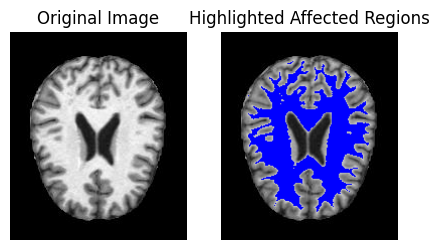

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load and display the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to highlight affected regions (example using thresholding)
def highlight_affected_regions(image, threshold=200):
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    mask = cv2.inRange(image, threshold, 255)
    highlighted_image[mask > 0] = [0, 0, 255]  # Highlight in red
    return highlighted_image

highlighted_image = highlight_affected_regions(image)

# Plot the images before and after highlighting
fig, ax = plt.subplots(1, 2, figsize=(5, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(highlighted_image)
ax[1].set_title('Highlighted Affected Regions')
ax[1].axis('off')

plt.show()


##Visualizing Brain Abnormalities

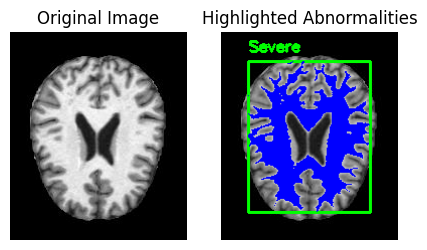

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to highlight abnormalities and draw bounding boxes
def highlight_abnormalities(image, lower_threshold, upper_threshold):
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    mask = cv2.inRange(image, lower_threshold, upper_threshold)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 50:  # Ignore small areas
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(highlighted_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box
            cv2.putText(highlighted_image, 'Severe', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    highlighted_image[mask > 0] = [0, 0, 255]  # Highlight in red
    return highlighted_image

highlighted_image = highlight_abnormalities(image, 200, 255)  # Example thresholds

# Plot the images before and after highlighting
fig, ax = plt.subplots(1, 2, figsize=(5, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(highlighted_image)
ax[1].set_title('Highlighted Abnormalities')
ax[1].axis('off')

plt.show()


#Segmentation of MRI Data

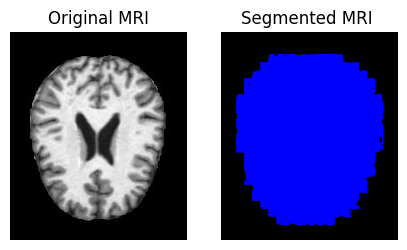

In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import filters

# Load the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection for segmentation
edges = filters.sobel(image)

# Highlight the edges on the original image
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
highlighted_image[edges > 0] = [0, 0, 255]  # Highlight edges in red

# Display the original and highlighted images side by side
fig, axes = plt.subplots(1, 2, figsize=(5, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original MRI')
axes[0].axis('off')

axes[1].imshow(highlighted_image)
axes[1].set_title('Segmented MRI ')
axes[1].axis('off')

plt.show()


#Ground truth for gettting accuracy

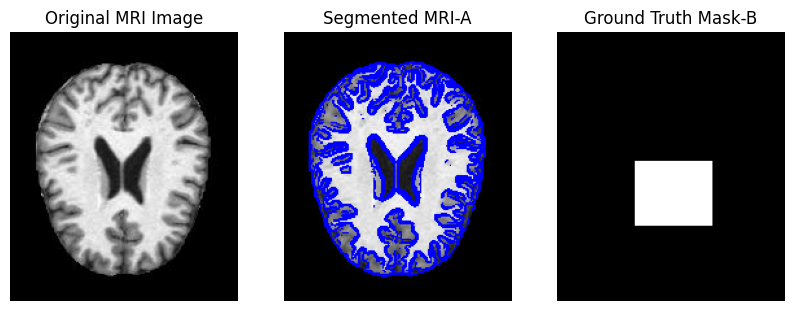

Dice Coefficient: 0.14


In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import filters
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Load the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection for segmentation
edges = filters.sobel(image)

# Create a binary mask from edges
binary_mask = edges > 0.1  # Adjust threshold as necessary

# Simulate a ground truth mask (For demonstration purposes)
# In practice, replace this with actual ground truth data
ground_truth_mask = np.zeros_like(image, dtype=bool)
ground_truth_mask[100:150, 60:120] = True  # Simulated region

# Calculate Dice coefficient
intersection = np.logical_and(binary_mask, ground_truth_mask)
dice_coefficient = 2. * intersection.sum() / (binary_mask.sum() + ground_truth_mask.sum())

# Highlight the edges on the original image
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
highlighted_image[binary_mask] = [0, 0, 255]  # Highlight edges in red

# Display the original and highlighted images side by side
fig, axes = plt.subplots(1, 3, figsize=(10,10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original MRI Image')
axes[0].axis('off')

axes[1].imshow(highlighted_image)
axes[1].set_title('Segmented MRI-A')
axes[1].axis('off')

axes[2].imshow(ground_truth_mask, cmap='gray')
axes[2].set_title('Ground Truth Mask-B')
axes[2].axis('off')

plt.show()

print(f"Dice Coefficient: {dice_coefficient:.2f}")


\[
\text{Dice Coefficient} = \frac{2 \times |A \cap B|}{|A| + |B|}
\]



where
𝐴
A is the predicted segmentation mask and
𝐵
B is the ground truth mask.

#Data Annotation

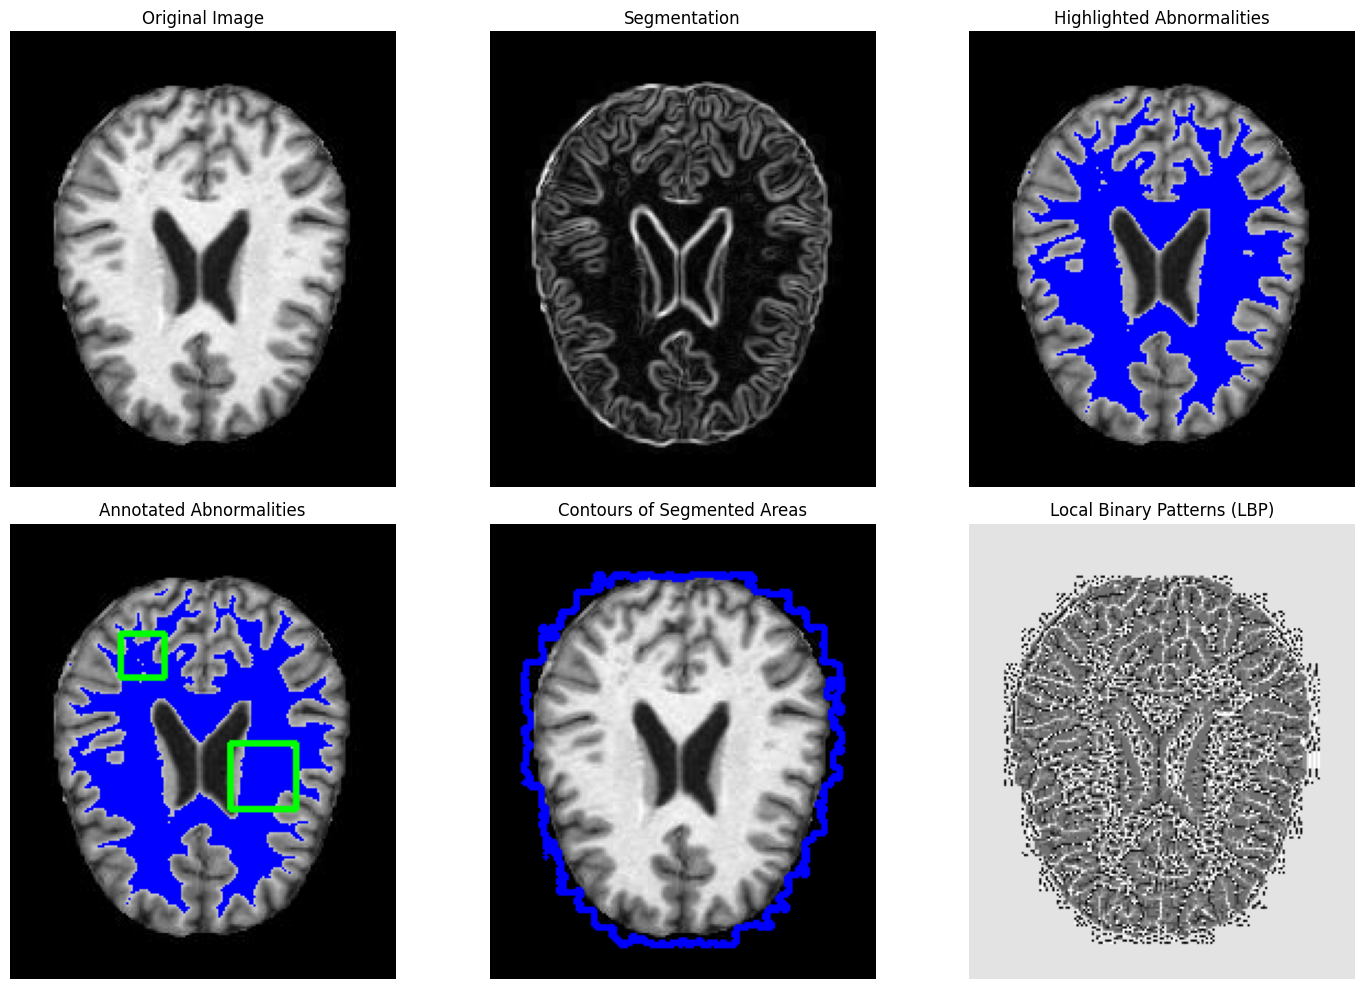

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure
from skimage.feature import local_binary_pattern

# Load the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to highlight abnormalities
def highlight_abnormalities(image, lower_threshold, upper_threshold):
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    mask = cv2.inRange(image, lower_threshold, upper_threshold)
    highlighted_image[mask > 0] = [0, 0, 255]  # Highlight in red
    return highlighted_image

highlighted_image = highlight_abnormalities(image, 200, 255)  # Example thresholds

# Apply edge detection for segmentation
edges = filters.sobel(image)

# Function to annotate the image by marking regions of interest
def annotate_image(image, regions):
    annotated_image = image.copy()
    for region in regions:
        x, y, w, h = region
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green rectangle
    return annotated_image

# Example regions to annotate
regions_of_interest = [(50, 50, 20, 20), (100, 100, 30, 30)]

# Annotated image with regions of interest
annotated_image = annotate_image(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), regions_of_interest)
highlighted_annotated_image = annotate_image(highlighted_image, regions_of_interest)

# Function to find and draw contours on the image
def draw_contours(image, edges):
    contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contoured_image, contours, -1, (0, 0, 255), 2)
    return contoured_image

contoured_image = draw_contours(image, edges)

# Perform Local Binary Patterns (LBP) for texture analysis
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# Display images before and after annotation, the contour, and LBP
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Segmentation')
axes[0, 1].axis('off')

axes[0, 2].imshow(highlighted_image)
axes[0, 2].set_title('Highlighted Abnormalities')
axes[0, 2].axis('off')

axes[1, 0].imshow(highlighted_annotated_image)
axes[1, 0].set_title('Annotated Abnormalities')
axes[1, 0].axis('off')

axes[1, 1].imshow(contoured_image)
axes[1, 1].set_title('Contours of Segmented Areas')
axes[1, 1].axis('off')

axes[1, 2].imshow(lbp, cmap='gray')
axes[1, 2].set_title('Local Binary Patterns (LBP)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


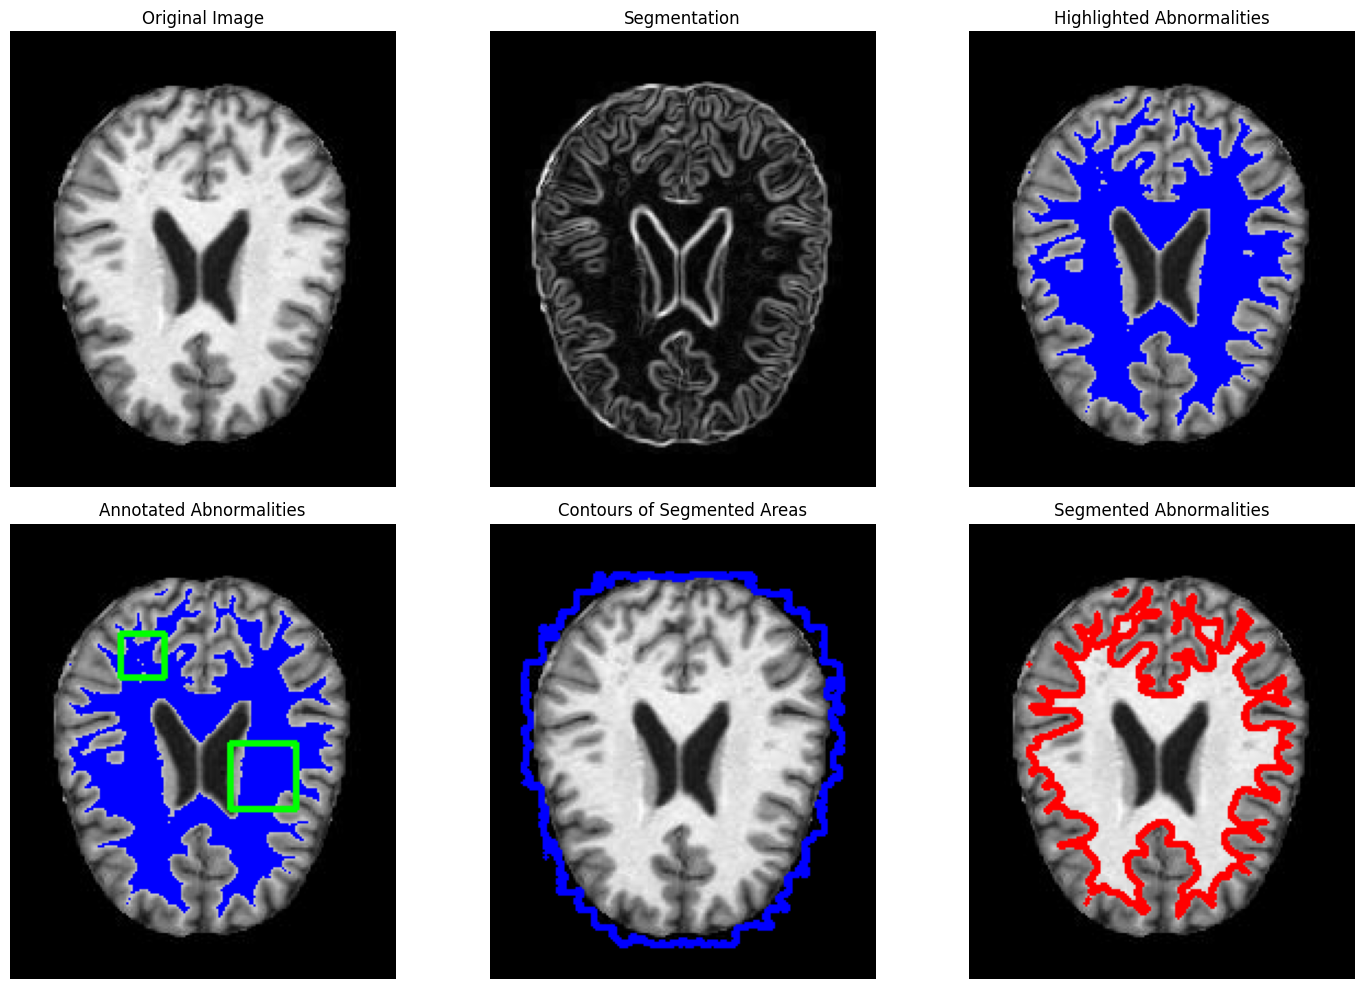

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure
from skimage.feature import local_binary_pattern

# Load the image
image_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented/nonDem2536.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to highlight abnormalities
def highlight_abnormalities(image, lower_threshold, upper_threshold):
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    mask = cv2.inRange(image, lower_threshold, upper_threshold)
    highlighted_image[mask > 0] = [0, 0, 255]  # Highlight in red
    return highlighted_image

highlighted_image = highlight_abnormalities(image, 200, 255)  # Example thresholds

# Apply edge detection for segmentation
edges = filters.sobel(image)

# Function to annotate the image by marking regions of interest
def annotate_image(image, regions):
    annotated_image = image.copy()
    for region in regions:
        x, y, w, h = region
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green rectangle
    return annotated_image

# Example regions to annotate
regions_of_interest = [(50, 50, 20, 20), (100, 100, 30, 30)]

# Annotated image with regions of interest
annotated_image = annotate_image(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), regions_of_interest)
highlighted_annotated_image = annotate_image(highlighted_image, regions_of_interest)

# Function to find and draw contours on the image
def draw_contours(image, edges):
    contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contoured_image, contours, -1, (0, 0, 255), 2)
    return contoured_image

contoured_image = draw_contours(image, edges)

# Perform Local Binary Patterns (LBP) for texture analysis
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# Perform segmentation using thresholding
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
segmented_contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(segmented_image, segmented_contours, -1, (255, 0, 0), 2)

# Display images before and after annotation, the contour, and LBP
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Segmentation')
axes[0, 1].axis('off')

axes[0, 2].imshow(highlighted_image)
axes[0, 2].set_title('Highlighted Abnormalities')
axes[0, 2].axis('off')

axes[1, 0].imshow(highlighted_annotated_image)
axes[1, 0].set_title('Annotated Abnormalities')
axes[1, 0].axis('off')

axes[1, 1].imshow(contoured_image)
axes[1, 1].set_title('Contours of Segmented Areas')
axes[1, 1].axis('off')

axes[1, 2].imshow(segmented_image)
axes[1, 2].set_title('Segmented Abnormalities')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


Loaded nonDem771.jpg for label NonDemented
Loaded verymildDem1587.jpg for label VeryMildDemented
Loaded mildDem321.jpg for label MildDemented
Loaded moderateDem12.jpg for label ModerateDemented


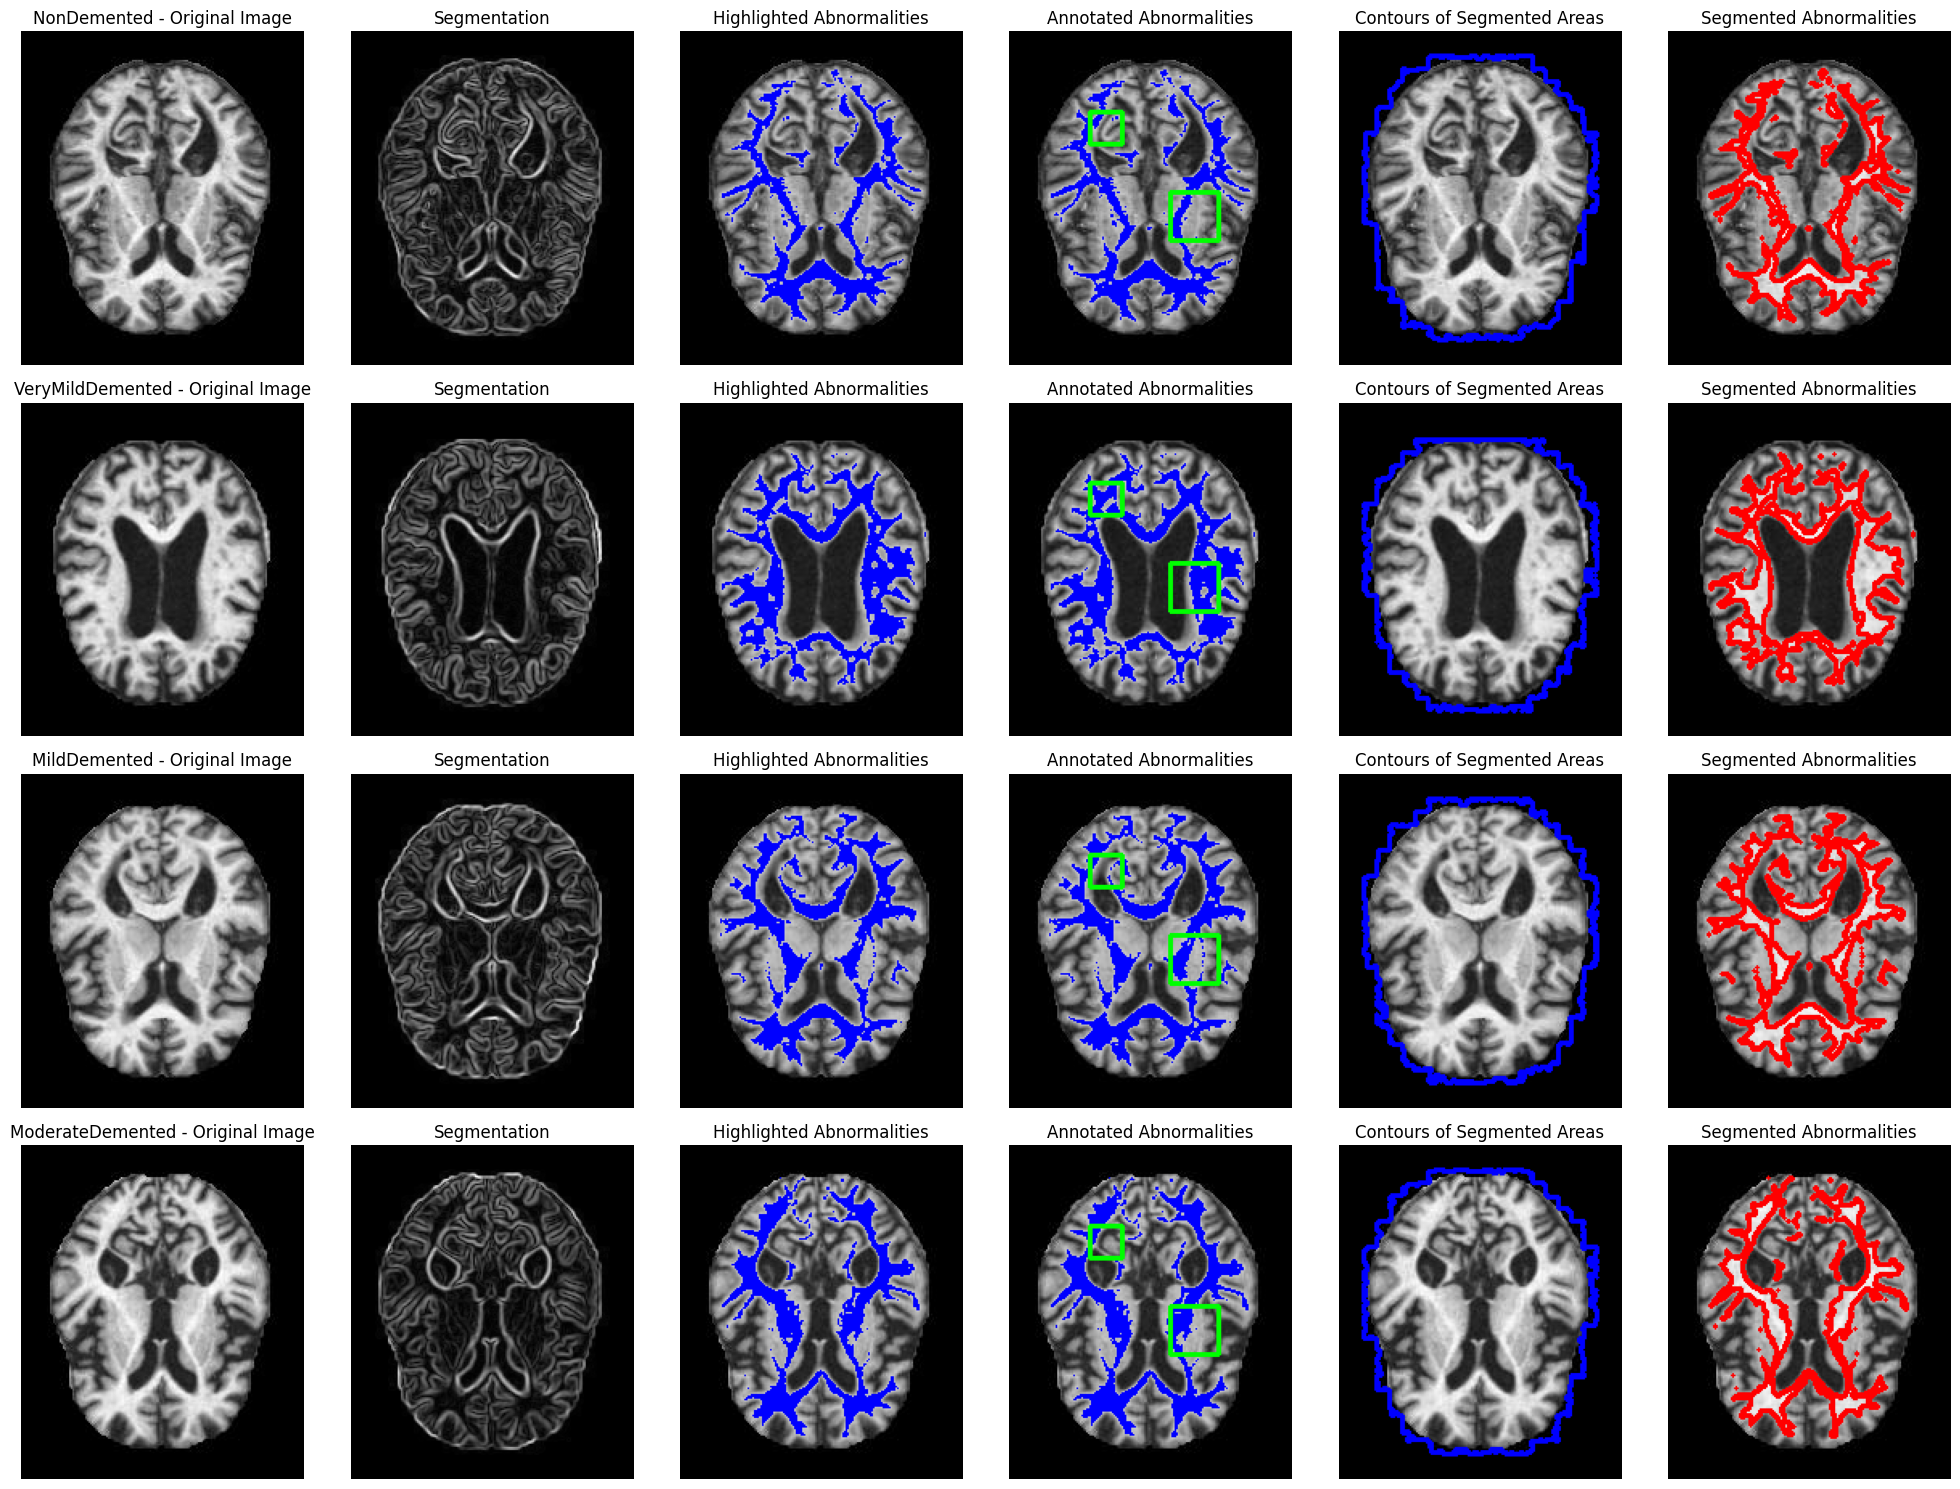

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure
from skimage.feature import local_binary_pattern
import random
import os

def load_random_image(folder_path):
    files = os.listdir(folder_path)
    random_file = random.choice(files)
    image_path = os.path.join(folder_path, random_file)
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), random_file

# Load images from each label
base_path = "/content/Alzheimer Dataset/Alzheimer_s Dataset/train"
labels = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

images = {}
for label in labels:
    folder_path = os.path.join(base_path, label)
    images[label], filename = load_random_image(folder_path)
    print(f"Loaded {filename} for label {label}")

# Analysis functions
def highlight_abnormalities(image, lower_threshold, upper_threshold):
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    mask = cv2.inRange(image, lower_threshold, upper_threshold)
    highlighted_image[mask > 0] = [0, 0, 255]  # Highlight in red
    return highlighted_image

def annotate_image(image, regions):
    annotated_image = image.copy()
    for region in regions:
        x, y, w, h = region
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green rectangle
    return annotated_image

def draw_contours(image, edges):
    contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contoured_image, contours, -1, (0, 0, 255), 2)
    return contoured_image

def perform_analysis(image):
    highlighted_image = highlight_abnormalities(image, 200, 255)
    edges = filters.sobel(image)
    regions_of_interest = [(50, 50, 20, 20), (100, 100, 30, 30)]
    annotated_image = annotate_image(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), regions_of_interest)
    highlighted_annotated_image = annotate_image(highlighted_image, regions_of_interest)
    contoured_image = draw_contours(image, edges)
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    _, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    segmented_contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segmented_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(segmented_image, segmented_contours, -1, (255, 0, 0), 2)
    return image, edges, highlighted_image, highlighted_annotated_image, contoured_image, segmented_image

fig, axes = plt.subplots(len(labels), 6, figsize=(20, 15))
for i, label in enumerate(labels):
    image, edges, highlighted_image, highlighted_annotated_image, contoured_image, segmented_image = perform_analysis(images[label])
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title(f'{label} - Original Image')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(edges, cmap='gray')
    axes[i, 1].set_title('Segmentation')
    axes[i, 1].axis('off')
    axes[i, 2].imshow(highlighted_image)
    axes[i, 2].set_title('Highlighted Abnormalities')
    axes[i, 2].axis('off')
    axes[i, 3].imshow(highlighted_annotated_image)
    axes[i, 3].set_title('Annotated Abnormalities')
    axes[i, 3].axis('off')
    axes[i, 4].imshow(contoured_image)
    axes[i, 4].set_title('Contours of Segmented Areas')
    axes[i, 4].axis('off')
    axes[i, 5].imshow(segmented_image)
    axes[i, 5].set_title('Segmented Abnormalities')
    axes[i, 5].axis('off')

plt.tight_layout()
plt.show()


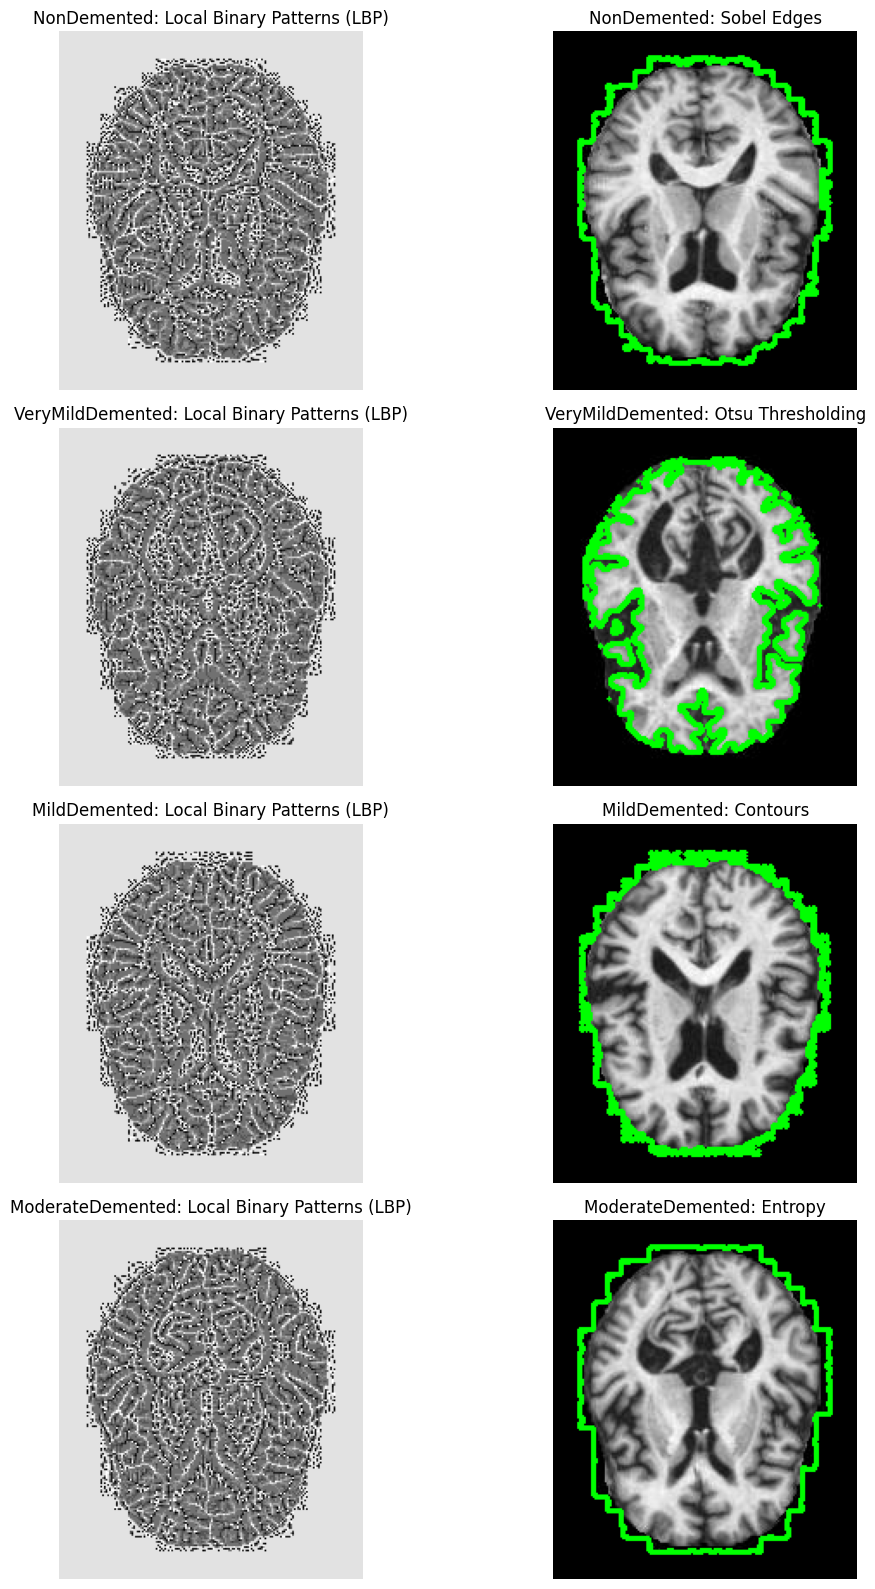

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage import exposure, filters, measure

# Function to get a random image from a given directory
def get_random_image(label_directory):
    image_files = os.listdir(label_directory)
    random_image_file = random.choice(image_files)
    image_path = os.path.join(label_directory, random_image_file)
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), random_image_file

# Directories for each label
labels = {
    "NonDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented",
    "VeryMildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/VeryMildDemented",
    "MildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/MildDemented",
    "ModerateDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/ModerateDemented"
}

# Function to perform Local Binary Patterns (LBP) analysis
def lbp_analysis(image):
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_image = exposure.rescale_intensity(lbp, out_range=(0, 255)).astype(np.uint8)
    return lbp_image

# Function to highlight contours in the image
def highlight_contours(image, edges):
    contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
    return contoured_image

# Function to perform a unique analysis for each label
def unique_analysis(image, label):
    if label == "NonDemented":
        edges = filters.sobel(image)
        highlighted = highlight_contours(image, edges)
        return highlighted, 'Sobel Edges'
    elif label == "VeryMildDemented":
        otsu_thresh = filters.threshold_otsu(image)
        binary_image = image > otsu_thresh
        highlighted = highlight_contours(image, binary_image)
        return highlighted, 'Otsu Thresholding'
    elif label == "MildDemented":
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
        return contoured_image, 'Contours'
    elif label == "ModerateDemented":
        entropy_image = filters.rank.entropy(image, np.ones((3, 3)).astype(np.uint8))
        highlighted = highlight_contours(image, entropy_image)
        return highlighted, 'Entropy'
    else:
        return image, 'Original'

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Process and display each label
for i, (label, directory) in enumerate(labels.items()):
    image, image_name = get_random_image(directory)
    lbp_image = lbp_analysis(image)
    unique_img, unique_title = unique_analysis(image, label)

    axes[i, 0].imshow(lbp_image, cmap='gray')
    axes[i, 0].set_title(f'{label}: Local Binary Patterns (LBP)')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(unique_img)
    axes[i, 1].set_title(f'{label}: {unique_title}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


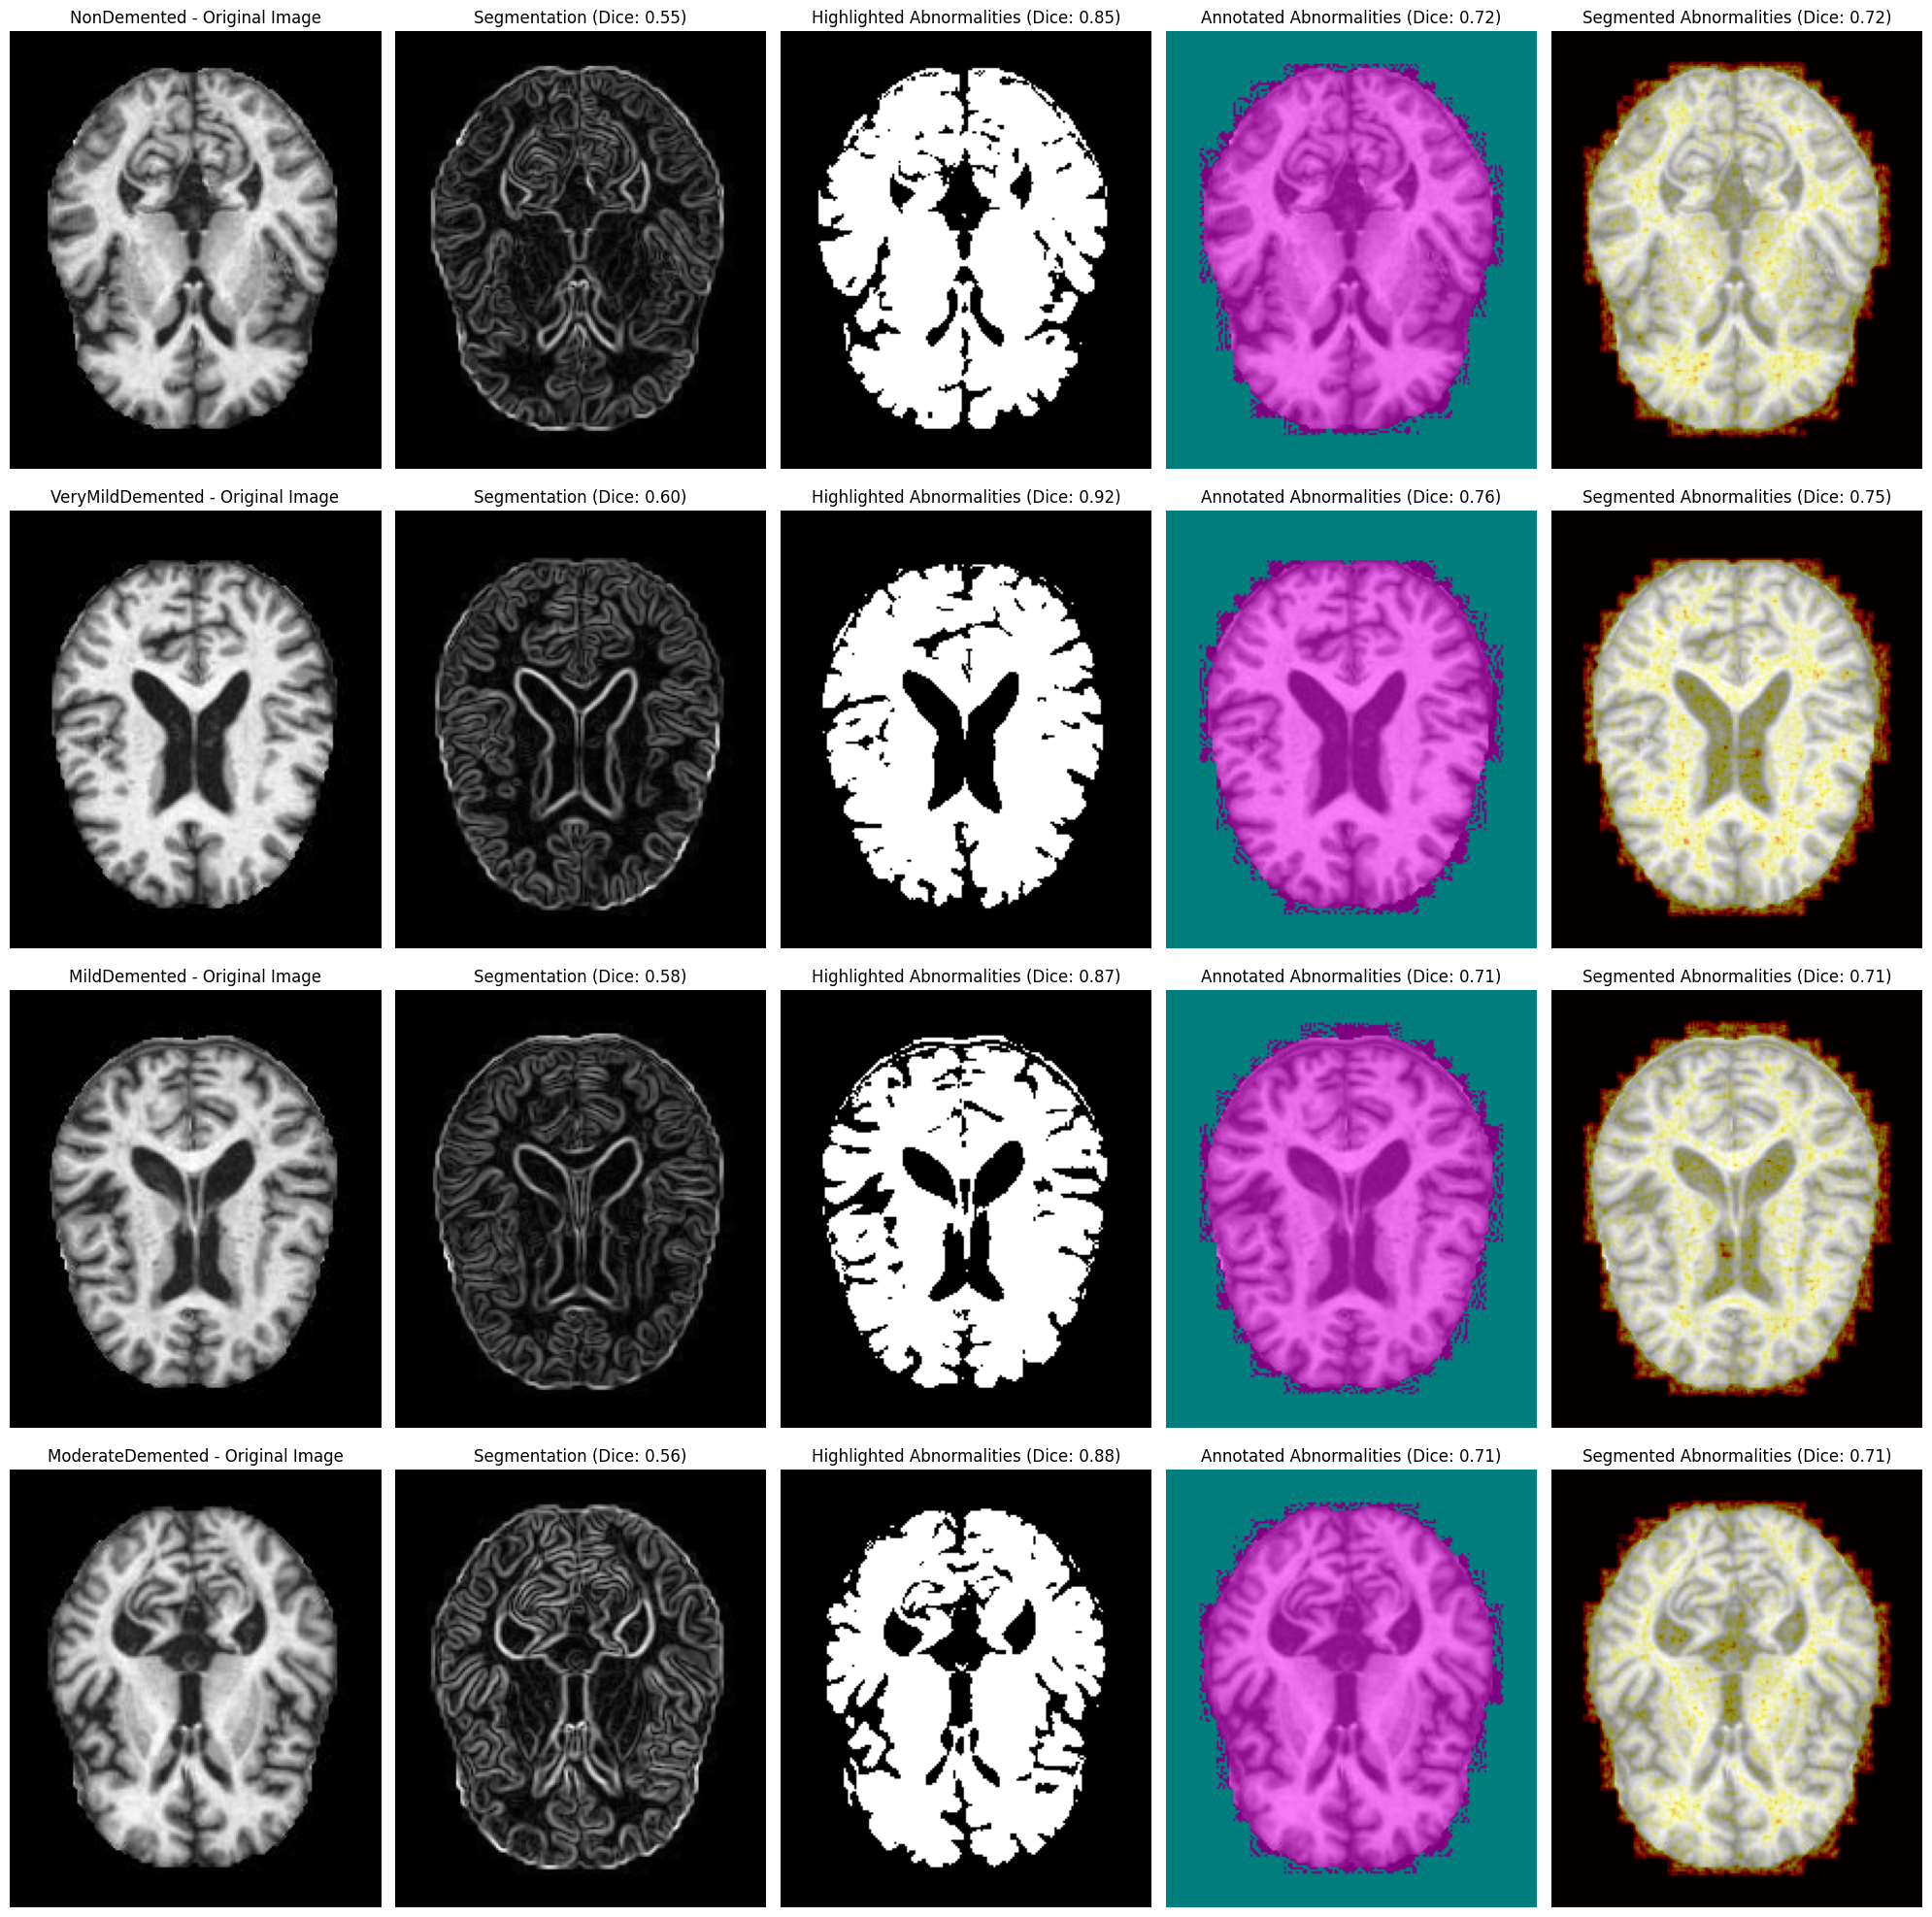

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage import exposure, filters, measure

# Function to calculate Dice Coefficient
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

# Function to generate synthetic ground truth data
def generate_synthetic_ground_truth(image):
    # Simple thresholding to create a synthetic ground truth
    _, synthetic_ground_truth = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return (synthetic_ground_truth > 127).astype(np.uint8)

# Function to apply different segmentation techniques and calculate Dice coefficient
def analyze_segmentation(image, ground_truth):
    results = {}

    # Sobel edge detection
    sobel_edges = filters.sobel(image)
    sobel_binary = (sobel_edges > np.mean(sobel_edges)).astype(np.uint8)
    results['Sobel Edge Detection'] = dice_coefficient(ground_truth, sobel_binary)

    # Otsu thresholding
    otsu_thresh = filters.threshold_otsu(image)
    otsu_binary = (image > otsu_thresh).astype(np.uint8)
    results['Otsu Thresholding'] = dice_coefficient(ground_truth, otsu_binary)

    # Contour detection
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = np.zeros_like(image)
    cv2.drawContours(contoured_image, contours, -1, 1, thickness=cv2.FILLED)
    results['Contour Detection'] = dice_coefficient(ground_truth, contoured_image)

    # Entropy filtering
    entropy_image = filters.rank.entropy(image, np.ones((3, 3)))
    entropy_binary = (entropy_image > np.mean(entropy_image)).astype(np.uint8)
    results['Entropy Filtering'] = dice_coefficient(ground_truth, entropy_binary)

    return results

# Function to get a random image from a given directory
def get_random_image(label_directory):
    image_files = os.listdir(label_directory)
    random_image_file = random.choice(image_files)
    image_path = os.path.join(label_directory, random_image_file)
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), random_image_file

# Directories for each label
labels = {
    "NonDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented",
    "VeryMildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/VeryMildDemented",
    "MildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/MildDemented",
    "ModerateDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/ModerateDemented"
}

# Create subplots
fig, axes = plt.subplots(len(labels), 5, figsize=(20, 20))

# Process and display each label
for i, (label, directory) in enumerate(labels.items()):
    image, image_name = get_random_image(directory)
    ground_truth = generate_synthetic_ground_truth(image)

    # Perform analyses
    lbp_image = local_binary_pattern(image, 8 * 1, 1, method='uniform')
    lbp_image = exposure.rescale_intensity(lbp_image, out_range=(0, 255)).astype(np.uint8)

    sobel_edges = filters.sobel(image)
    otsu_thresh = filters.threshold_otsu(image)
    otsu_binary = (image > otsu_thresh).astype(np.uint8)
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = np.zeros_like(image)
    cv2.drawContours(contoured_image, contours, -1, 1, thickness=cv2.FILLED)
    entropy_image = filters.rank.entropy(image, np.ones((3, 3)))

    # Calculate Dice coefficients
    results = analyze_segmentation(image, ground_truth)

    # Display images
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title(f'{label} - Original Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel_edges, cmap='gray')
    axes[i, 1].set_title(f'Segmentation (Dice: {results["Sobel Edge Detection"]:.2f})')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(otsu_binary, cmap='gray')
    axes[i, 2].set_title(f'Highlighted Abnormalities (Dice: {results["Otsu Thresholding"]:.2f})')
    axes[i, 2].axis('off')

    axes[i, 3].imshow(image, cmap='gray')
    axes[i, 3].imshow(contoured_image, cmap='cool', alpha=0.5)
    axes[i, 3].set_title(f'Annotated Abnormalities (Dice: {results["Contour Detection"]:.2f})')
    axes[i, 3].axis('off')

    axes[i, 4].imshow(image, cmap='gray')
    axes[i, 4].imshow(entropy_image, cmap='hot', alpha=0.5)
    axes[i, 4].set_title(f'Segmented Abnormalities (Dice: {results["Entropy Filtering"]:.2f})')
    axes[i, 4].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os

# Base directory
base_dir = '/content/Alzheimer Dataset/Alzheimer_s Dataset'

# List the contents of the base directory
for root, dirs, files in os.walk(base_dir):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))


In [ ]:
labels = {
    "NonDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/NonDemented",
    "VeryMildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/VeryMildDemented",
    "MildDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/MildDemented",
    "ModerateDemented": "/content/Alzheimer Dataset/Alzheimer_s Dataset/train/ModerateDemented"
}


In [ ]:
def load_data(label_dirs):
    images = []
    masks = []
    for label, directory in label_dirs.items():
        for filename in os.listdir(directory):
            img_path = os.path.join(directory, filename)
            # Assuming masks are in a similar structure
            mask_path = img_path.replace("train", "mask").replace(".jpg", "_mask.jpg")
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if img is not None and mask is not None:
                images.append(img)
                masks.append(mask)
            else:
                print(f"Mask not found: {mask_path}")
    images = np.array(images)
    masks = np.array(masks)
    images = images / 255.0
    masks = masks / 255.0
    masks = np.expand_dims(masks, axis=-1)
    return images, masks


In [1]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/Alzheimer Dataset.zip'
# Destination directory
extract_path = '/content/Alzheimer Dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


In [2]:
# List the contents
contents = os.listdir(extract_path)
print("Contents of the dataset:")
for item in contents:
    print(item)


Contents of the dataset:
Alzheimer_s Dataset


In [3]:
# Check for labels and annotations
label_files = []
annotation_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if 'label' in file.lower():
            label_files.append(os.path.join(root, file))
        if 'annotation' in file.lower():
            annotation_files.append(os.path.join(root, file))

print("Label files found:")
for label in label_files:
    print(label)

print("Annotation files found:")
for annotation in annotation_files:
    print(annotation)


Label files found:
Annotation files found:


In [4]:
import os

# Define paths to the train and test directories
train_path = '/content/Alzheimer Dataset/Alzheimer_s Dataset/train'
test_path = '/content/Alzheimer Dataset/Alzheimer_s Dataset/test'

# Function to count images in subfolders
def count_images_in_subfolders(directory):
    subfolder_counts = {}
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            subfolder_counts[dir_name] = image_count
    return subfolder_counts

# Count images in train and test subfolders
train_image_counts = count_images_in_subfolders(train_path)
test_image_counts = count_images_in_subfolders(test_path)

# Print the number of images per label in train and test sets
print("Number of images per label in train set:")
for label, count in train_image_counts.items():
    print(f"{label}: {count}")

print("\nNumber of images per label in test set:")
for label, count in test_image_counts.items():
    print(f"{label}: {count}")


Number of images per label in train set:
MildDemented: 717
VeryMildDemented: 1792
ModerateDemented: 52
NonDemented: 2560

Number of images per label in test set:
MildDemented: 179
VeryMildDemented: 448
ModerateDemented: 12
NonDemented: 640


In [ ]:
from sklearn.metrics import jaccard_score, precision_score, recall_score, f1_score

def evaluate_segmentation(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = (y_pred.flatten() > 0.5).astype(int)  # Binarize predictions

    dice = 2 * np.sum(y_true_flat * y_pred_flat) / (np.sum(y_true_flat) + np.sum(y_pred_flat))
    iou = jaccard_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat)
    recall = recall_score(y_true_flat, y_pred_flat)
    f1 = f1_score(y_true_flat, y_pred_flat)
    accuracy = np.mean(y_true_flat == y_pred_flat)

    print(f"Dice Coefficient: {dice:.2f}")
    print(f"IoU: {iou:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

# Example usage with the validation set
for i in range(len(X_val)):
    y_true = y_val[i].squeeze()
    y_pred = model.predict(np.expand_dims(X_val[i], axis=(0, -1)))[0].squeeze()
    evaluate_segmentation(y_true, y_pred)


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.49
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 27ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.51
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 31ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 26ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 26ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.49
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.51
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.51
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.49
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 27ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 21ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 24ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 27ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50
1/1 [==============================] - 0s 22ms/step
Dice Coefficient: 0.00
IoU: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
